In [ ]:
# Question 1: Simulation of Markov Process

In [1]:
# a) Create probability Matrix

import numpy as np

P = np.array([
    [0.2, 0.7, 0.1],
    [0.2, 0.5, 0.3],
    [0.2, 0.4, 0.4]
])

In [2]:
# b) Simulate one realization

# Define the initial probability distribution
pi_0 = np.array([1, 0, 0])

# Number of time steps to simulate
# realizations = 1

pi_1 = np.dot(pi_0, P)

pi_1

array([0.2, 0.7, 0.1])

In [ ]:
# Question 2: Stationary Distribution

In [5]:
# a) Calculate the stationary distribution pi_inf

eigenvalues, eigenvectors = np.linalg.eig(P.T)
stationary_index = np.where(np.isclose(eigenvalues, 1.0))[0][0]
pi_inf = eigenvectors[:, stationary_index]
pi_inf /= pi_inf.sum()  # Normalize to ensure it sums to 1

print("Stationary Distribution (pi_inf):")
print(pi_inf)

Stationary Distribution (pi_inf):
[0.2        0.51111111 0.28888889]


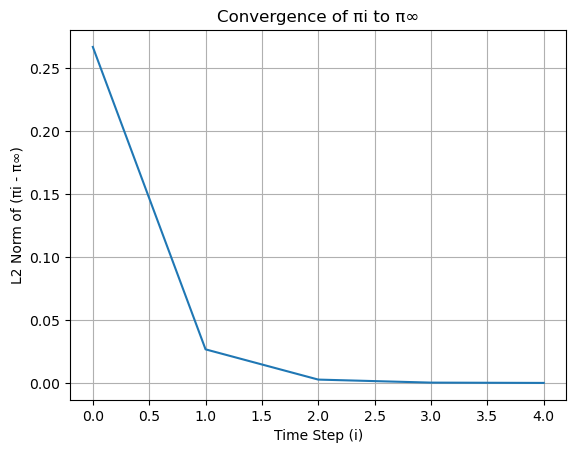

[array([0.2, 0.7, 0.1]),
 array([0.2 , 0.53, 0.27]),
 array([0.2  , 0.513, 0.287]),
 array([0.2   , 0.5113, 0.2887]),
 array([0.2    , 0.51113, 0.28887])]

In [11]:
# b) Show convergence

import matplotlib.pyplot as plt

# Number of time steps to simulate
num_steps = 5

# Initialize arrays to store results and calculate L2 norm
pi_values = []
l2_norms = []

pi_current = pi_0
for i in range(num_steps):
    pi_next = np.dot(pi_current, P)
    pi_values.append(pi_next)
    l2_norm = np.linalg.norm(pi_next - pi_inf, ord=2)  # L2 norm
    l2_norms.append(l2_norm)
    pi_current = pi_next

# Plot i vs. L2 norm of (πi - π∞)
plt.plot(range(num_steps), l2_norms)
plt.xlabel("Time Step (i)")
plt.ylabel("L2 Norm of (πi - π∞)")
plt.title("Convergence of πi to π∞")
plt.grid(True)
plt.show()

pi_values

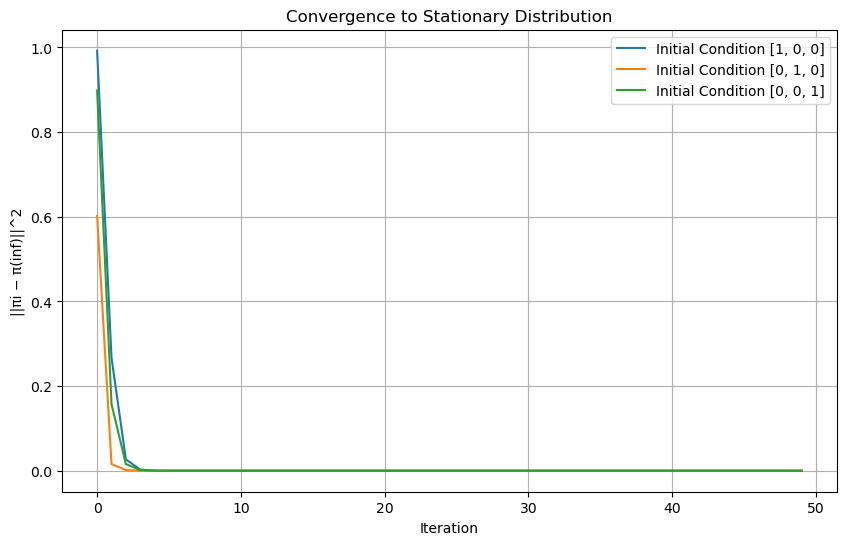

In [9]:
# b) Plotting for ifferent initial conditions π0 

stationary_vector_real = np.array([0.2, 0.51111111, 0.28888889])

num_iterations = 50


def calculate_pi_i(pi_0, P, i):
    return pi_0.dot(np.linalg.matrix_power(pmatrix, i))

pi0_a = np.array([1, 0, 0])
pi0_b = np.array([0, 1, 0])
pi0_c = np.array([0, 0, 1])  

norms_a = []
norms_b = []
norms_c = []

for i in range(num_iterations):
    pi_i_a = calculate_pi_i(pi0_a, P, i)
    pi_i_b = calculate_pi_i(pi0_b, P, i)
    pi_i_c = calculate_pi_i(pi0_c, P, i)
    
    norm_a = np.linalg.norm(pi_i_a - stationary_vector_real, 2)
    norm_b = np.linalg.norm(pi_i_b - stationary_vector_real, 2)
    norm_c = np.linalg.norm(pi_i_c - stationary_vector_real, 2)
    
    norms_a.append(norm_a)
    norms_b.append(norm_b)
    norms_c.append(norm_c)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), norms_a, label='Initial Condition [1, 0, 0]')
plt.plot(range(num_iterations), norms_b, label='Initial Condition [0, 1, 0]')
plt.plot(range(num_iterations), norms_c, label='Initial Condition [0, 0, 1]')
plt.xlabel('Iteration')
plt.ylabel('||πi − π(inf)||^2')
plt.title('Convergence to Stationary Distribution')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Comparison: For all initial starting values it converges quickly.  

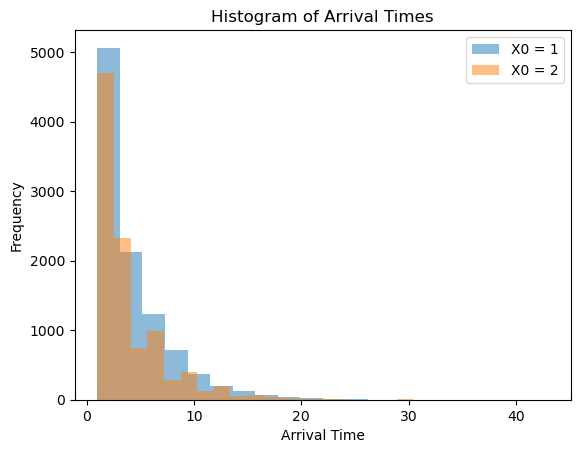

Mean Arrival Time for X0 = 1: 4.5436
Mean Arrival Time for X0 = 2: 3.8177


In [12]:
# Question 3: Absorbing state

# a) 

# Number of simulations
num_simulations = 10000

# Variables to store arrival times
arrival_times_x0_1 = []
arrival_times_x0_2 = []

# Simulate arrival times for X0 = 1 and X0 = 2
for _ in range(num_simulations):
    # Simulate the Markov chain starting from X0 = 1
    # Record the arrival time to Xi = 3 for this simulation
    arrival_time_x0_1 = 0  # Initialize arrival time
    current_state = 1  # Initial state X0 = 1
    while current_state != 3:
    # Transition to the next state based on the transition probabilities
        current_state = np.random.choice([1, 2, 3], p=P[current_state - 1])
        arrival_time_x0_1 += 1  # Increment the arrival time
    arrival_times_x0_1.append(arrival_time_x0_1)
    
    # Simulate the Markov chain starting from X0 = 2
    # Record the arrival time to Xi = 3 for this simulation
    arrival_time_x0_2 = 0  # Initialize arrival time
    current_state = 2  # Initial state X0 = 2
    while current_state != 3:
    # Transition to the next state based on the transition probabilities
        current_state = np.random.choice([1, 2, 3], p=P[current_state - 1])
        arrival_time_x0_2 += 1  # Increment the arrival time
    arrival_times_x0_2.append(arrival_time_x0_2)

# Create histograms of arrival times
plt.hist(arrival_times_x0_1, bins=20, label='X0 = 1', alpha=0.5)
plt.hist(arrival_times_x0_2, bins=20, label='X0 = 2', alpha=0.5)
plt.xlabel('Arrival Time')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Arrival Times')
plt.show()

# Compute mean arrival times
mean_arrival_time_x0_1 = np.mean(arrival_times_x0_1)
mean_arrival_time_x0_2 = np.mean(arrival_times_x0_2)

print('Mean Arrival Time for X0 = 1:', mean_arrival_time_x0_1)
print('Mean Arrival Time for X0 = 2:', mean_arrival_time_x0_2)

b) Compute the theoretical mean arrival time to the abosorbing state

$$ \mu_1 = 1 + 0.2\mu_1 + 0.7\mu_2 + 0.1\mu_3 $$

$$ \mu_2 = 1 + 0.2\mu_1 + 0.5\mu_2 + 0.3\mu_3 $$

$$ \mu_3 = 0 $$

Then we get:

$$ \mu_1 = 1 + 0.2\mu_1 + 0.7\mu_2 + 0.1\cdot 0 $$

$$ \mu_1 = 1 + 0.2\mu_1 + 0.7\mu_2 $$

$$ \mu_1 = \frac{1 + 0.7\mu_2}{0.8} $$


$$ \mu_2 = 1 + 0.2\mu_1 + 0.5\mu_2 + 0.3\cdot 0 $$

$$ \mu_2 = 1 + 0.2\mu_1 + 0.5\mu_2 $$

$$ \mu_2 = \frac{1 + 0.2\mu_1}{0.5} $$


Plugging the equation for $\mu_1$ into the equation for $\mu_2$ it follows:

$$ 0.5 \mu_2 = 1 + \frac{0.2 (1 + 0.7\mu_2 )}{0.8} $$

$$ 0.5\mu_2 = 1 + 0.25 + 0.175 \mu_2) $$

$$ 0.325 \mu_2 = 1.25 $$

$$ \mu_2 = 0.8 $$

$$ \mu_2 \approx 3.846 $$


Finnaly plugging in $\mu_2$ to get $\mu_1$:

$$ \mu_1 = \frac{1 + 0.7\mu_2}{0.8} $$

$$ \mu_1 = \frac{1 + 0.7(3.846)}{0.8} $$

$$ \mu_1 \approx 4.615 $$


In [13]:
# Comparison a) & b) the theoretically calculated arrival times are very 
# close to the simulated values in a) 